Finsihed opening molecule after 0.546875 seconds
Adding object to scene.
Added res_id after 0.0 s
Added res_name after 0.015625 s
Added atomic_number after 0.0 s
Added b_factor after 0.0 s
Added vdw_radii after 0.0 s
Added chain_id after 0.0 s
Added entity_id after 0.0 s
Added atom_name after 0.0 s
Added lipophobicity after 0.0 s
Added charge after 0.0 s
Added is_backbone after 0.0 s
Added is_alpha_carbon after 0.0 s
Added is_solvent after 0.0 s
Added is_nucleic after 0.0 s
Added is_peptide after 0.0 s
Added is_hetero after 0.0 s
Added is_carb after 0.0 s
Added sec_struct after 0.0 s
Finsihed add object after 0.015625 seconds


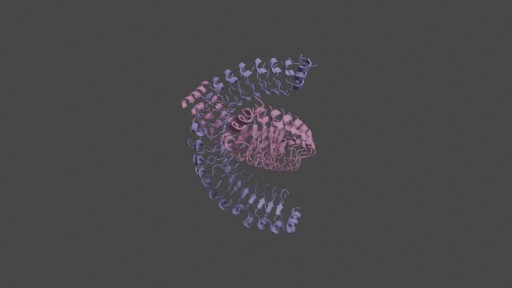

In [1]:
import bpy
import tempfile
from math import pi

def generate():

    for obj in bpy.context.scene.objects:
      if obj.type == 'MESH':
          bpy.data.objects.remove(obj, do_unlink=True)


    import molecularnodes as mn
    molecule = mn.load.molecule_rcsb("7TYG", starting_style="cartoon", center_molecule=True)
    molecule.select_set(True)

    bpy.ops.view3d.camera_to_view_selected()
    camera = bpy.data.objects["Camera"]
    camera.data.dof.use_dof = True
    camera.data.dof.focus_distance = 5
    camera.data.dof.aperture_fstop = 4
    camera.data.angle = pi / 3
    camera.data.type = "PERSP"

    with tempfile.NamedTemporaryFile(suffix=".JPEG", delete=False) as f:
        bpy.context.scene.render.resolution_y = 288
        bpy.context.scene.render.resolution_x = 512
        bpy.context.scene.render.image_settings.file_format = "JPEG"
        bpy.context.scene.render.filepath = f.name
        bpy.context.scene.frame_set(1)
        bpy.context.scene.frame_current = 1
        bpy.ops.render.render(animation=False, write_still=True)

        bpy.data.images["Render Result"].save_render(
            filepath=bpy.context.scene.render.filepath
        )
        bpy.app.handlers.render_stats.clear()
        return f.name


from IPython.display import Image
Image(generate())

In [3]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')